In [119]:
import pandas
import matplotlib.pyplot
import datetime
import email.utils
import math

In [30]:
astro = pandas.read_csv('astro.csv')
#astro.when_recorded_rounded = pandas.to_datetime(astro.when_recorded_rounded)

In [115]:
weather = pandas.read_csv('weather.csv')
weather.sample(5)

,when_recorded,clouds
9148,2022-07-08 13:45:06.612742+10:00,0.0
54015,2023-10-20 05:00:11.605002+11:00,0.0
39504,2023-05-21 21:00:11.725620+10:00,3.0
39154,2023-05-18 05:30:05.854841+10:00,50.0
56879,2023-11-19 06:30:05.298320+11:00,53.0


In [118]:
weather['when'] = weather.when_recorded.map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f%z"))

In [44]:
astro['when'] = astro.when_recorded_rounded.map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z"))

In [122]:
astro['moon_altitude_degrees'] = astro.moon_altitude * 90 / (math.pi / 2)
astro['moon_azimuth_degrees'] = astro.moon_azimuth * 90 / (math.pi / 2)

In [63]:
astro['moon_below_horizon'] = astro.moon_altitude < 0
# Don't know if that's right...

In [123]:
astro.describe()

,watts,moon_azimuth,moon_altitude,moon_phase,sun_azimuth,sun_elevation,moon_altitude_degrees,moon_azimuth_degrees
count,310813.000000,310813.000000,310813.000000,310813.000000,310813.000000,310813.000000,310813.000000,310813.000000
mean,1006.054033,3.142757,-0.033346,49.878600,180.185429,-0.103752,-1.910591,180.066686
std,1923.687110,1.820464,0.583498,35.077508,99.717579,39.253168,33.431978,104.304877
min,-12.353000,0.000009,-1.254072,0.000665,0.000000,-79.680000,-71.853030,0.000516
25%,-9.741000,1.560124,-0.463168,15.095622,89.970000,-32.140000,-26.537551,89.388530
50%,-8.891000,3.143414,-0.018721,49.539566,180.790000,0.420000,-1.072651,180.104384
75%,1034.391000,4.726072,0.382668,84.834488,270.180000,32.070000,21.925250,270.783997
max,7862.450000,6.283181,1.243226,99.999557,359.990000,79.690000,71.231619,359.999737


In [124]:
midnights = astro[astro.when.map(lambda x: x.hour in [0,23])]
midnights

,when_recorded_rounded,watts,moon_azimuth,moon_altitude,moon_phase,sun_azimuth,sun_elevation,when,moon_below_horizon,moon_altitude_degrees,moon_azimuth_degrees
19,2020-12-04 00:10:00+11:00,-9.285,3.200904,0.308024,90.656113,189.92,-33.44,2020-12-04 00:10:00+11:00,False,17.648502,183.398311
20,2020-12-04 00:35:00+11:00,-9.099,3.094423,0.308631,90.553673,183.00,-34.02,2020-12-04 00:35:00+11:00,False,17.683266,177.297381
21,2020-12-04 00:45:00+11:00,-9.610,3.051832,0.306840,90.512550,180.21,-34.08,2020-12-04 00:45:00+11:00,False,17.580632,174.857077
82,2020-12-04 23:30:00+11:00,-9.035,3.598875,0.263915,84.126495,200.62,-31.10,2020-12-04 23:30:00+11:00,False,15.121219,206.200324
83,2020-12-04 23:35:00+11:00,-9.897,3.577601,0.269911,84.100380,199.33,-31.45,2020-12-04 23:35:00+11:00,False,15.464785,204.981449
...,...,...,...,...,...,...,...,...,...,...,...
310802,2024-01-09 23:40:00+11:00,-9.385,5.374391,-0.028308,5.340351,202.36,-30.80,2024-01-09 23:40:00+11:00,True,-1.621947,307.929926
310803,2024-01-10 00:05:00+11:00,-8.703,5.270554,0.012621,5.254013,195.86,-32.50,2024-01-10 00:05:00+11:00,False,0.723143,301.980504
310804,2024-01-10 00:40:00+11:00,-9.156,5.124988,0.087615,5.134222,186.33,-33.90,2024-01-10 00:40:00+11:00,False,5.019993,293.640160
310805,2024-01-10 00:50:00+11:00,-9.768,5.083353,0.111016,5.100228,183.54,-34.08,2024-01-10 00:50:00+11:00,False,6.360744,291.254648


In [152]:
werewolf_time = midnights[midnights.moon_phase > 90]
werewolf_time

,when_recorded_rounded,watts,moon_azimuth,moon_altitude,moon_phase,sun_azimuth,sun_elevation,when,moon_below_horizon,moon_altitude_degrees,moon_azimuth_degrees
19,2020-12-04 00:10:00+11:00,-9.285,3.200904,0.308024,90.656113,189.92,-33.44,2020-12-04 00:10:00+11:00,False,17.648502,183.398311
20,2020-12-04 00:35:00+11:00,-9.099,3.094423,0.308631,90.553673,183.00,-34.02,2020-12-04 00:35:00+11:00,False,17.683266,177.297381
21,2020-12-04 00:45:00+11:00,-9.610,3.051832,0.306840,90.512550,180.21,-34.08,2020-12-04 00:45:00+11:00,False,17.580632,174.857077
1320,2020-12-27 23:45:00+11:00,-9.686,2.114209,0.074030,93.494301,199.23,-30.48,2020-12-27 23:45:00+11:00,False,4.241622,121.135263
1321,2020-12-27 23:55:00+11:00,-9.508,2.071723,0.051181,93.527367,196.66,-31.12,2020-12-27 23:55:00+11:00,False,2.932465,118.700983
...,...,...,...,...,...,...,...,...,...,...,...
309968,2023-12-29 23:10:00+11:00,-9.140,3.387779,0.311954,93.800781,207.97,-27.58,2023-12-29 23:10:00+11:00,False,17.873673,194.105425
309969,2023-12-29 23:35:00+11:00,-9.206,3.281015,0.326296,93.720329,201.92,-29.77,2023-12-29 23:35:00+11:00,False,18.695365,187.988307
309970,2023-12-29 23:55:00+11:00,-9.438,3.195587,0.332514,93.655624,196.84,-31.15,2023-12-29 23:55:00+11:00,False,19.051665,183.093644
309971,2023-12-30 00:20:00+11:00,-9.320,3.088794,0.333593,93.574318,190.25,-32.36,2023-12-30 00:20:00+11:00,False,19.113451,176.974832


<Axes: xlabel='moon_phase', ylabel='watts'>

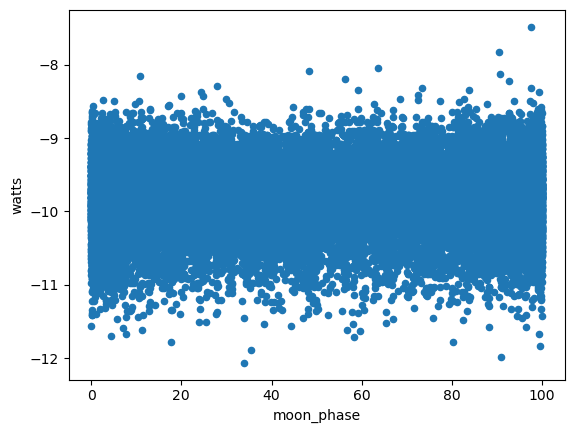

In [126]:
midnights.plot.scatter(x='moon_phase', y='watts')

In [127]:
midnights.groupby('moon_below_horizon').watts.mean()

moon_below_horizon
False   -9.803585
True    -9.822543
Name: watts, dtype: float64

In [128]:
moon_up = midnights[~midnights.moon_below_horizon]
moon_down = midnights[midnights.moon_below_horizon]

<Axes: ylabel='Frequency'>

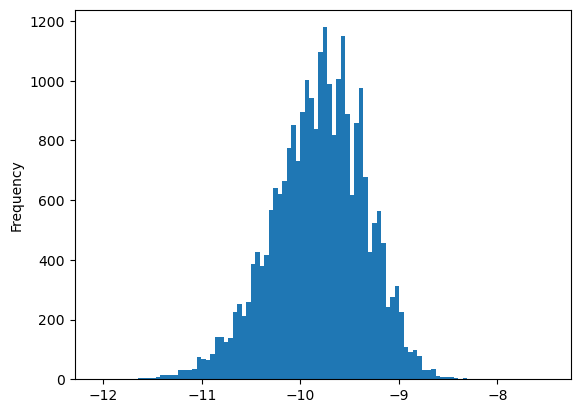

In [129]:
midnights.watts.plot.hist(bins=100)

In [130]:
import seaborn

/Users/gregb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gregb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gregb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gregb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

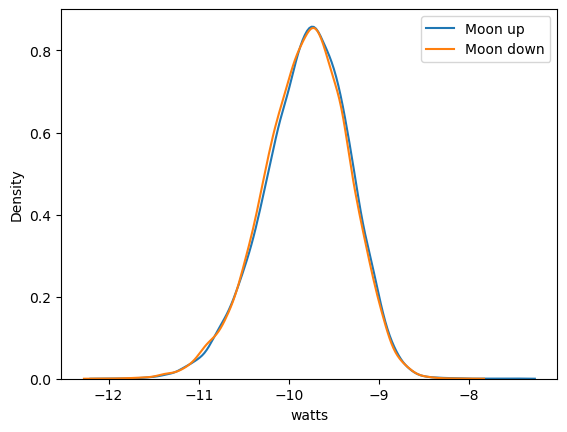

In [131]:
fig, ax = matplotlib.pyplot.subplots()
seaborn.kdeplot(moon_up.watts, ax=ax, label="Moon up")
seaborn.kdeplot(moon_down.watts, ax=ax, label="Moon down")
ax.legend()

In [132]:
import scipy
import scipy.stats

In [133]:
moon_down.watts.mean(), moon_down.watts.median()

(-9.822543207076436, -9.798)

In [134]:
moon_up.watts.mean(), moon_up.watts.median()

(-9.803584945729119, -9.775500000000001)

In [135]:
moon_impact = moon_up.watts.mean() - moon_down.watts.mean()
moon_impact

0.018958261347316707

In [136]:
scipy.stats.ttest_ind(moon_down.watts, moon_up.watts)

TtestResult(statistic=-3.22797985646032, pvalue=0.0012482264610418215, df=25939.0)

In [166]:
scipy.stats.mannwhitneyu(moon_down.watts, moon_up.watts)

MannwhitneyuResult(statistic=82074576.5, pvalue=0.0008600560002839036)

<Axes: xlabel='moon_altitude_degrees', ylabel='watts'>

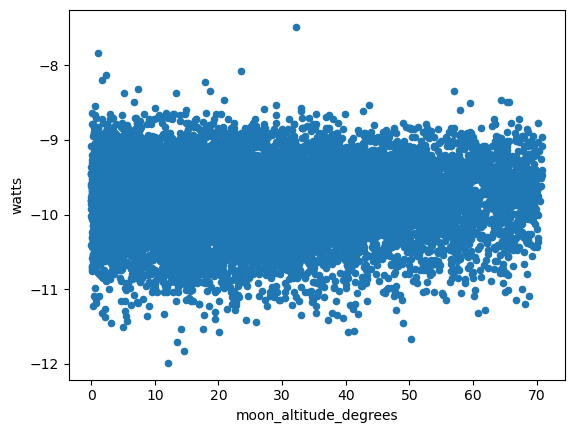

In [138]:
moon_up.plot.scatter(x='moon_altitude_degrees', y='watts')

In [139]:
moon_up[['watts', 'moon_altitude_degrees', 'moon_phase', 'moon_azimuth_degrees']].corr()['watts']

watts                    1.000000
moon_altitude_degrees    0.027914
moon_phase               0.006736
moon_azimuth_degrees     0.005934
Name: watts, dtype: float64

In [140]:
moon_down[['watts', 'moon_altitude_degrees', 'moon_phase', 'moon_azimuth_degrees']].corr()['watts']

watts                    1.000000
moon_altitude_degrees   -0.002740
moon_phase               0.021210
moon_azimuth_degrees     0.014488
Name: watts, dtype: float64

<Axes: xlabel='moon_azimuth_degrees', ylabel='moon_altitude_degrees'>

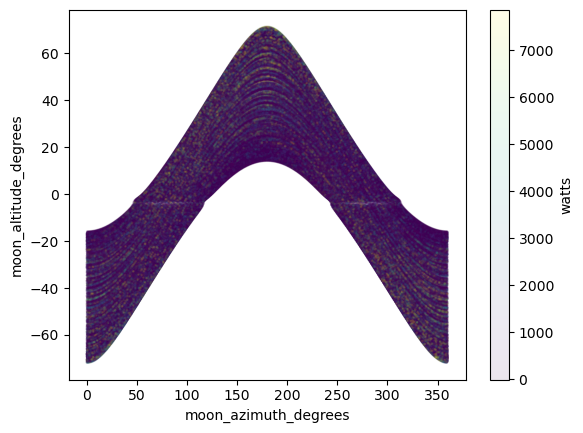

In [147]:
astro.plot.scatter(x='moon_azimuth_degrees', y='moon_altitude_degrees', c='watts', alpha=0.1, s=1)

<Axes: xlabel='moon_azimuth_degrees', ylabel='moon_altitude_degrees'>

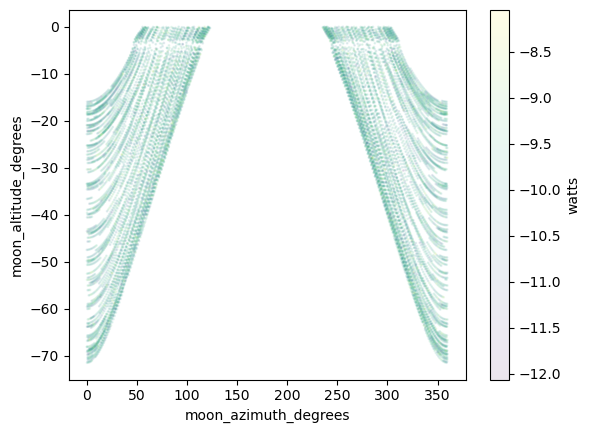

In [146]:
moon_down.plot.scatter(x='moon_azimuth_degrees', y='moon_altitude_degrees', c='watts', alpha=0.1, s=1)

<Axes: xlabel='moon_azimuth_degrees', ylabel='moon_altitude_degrees'>

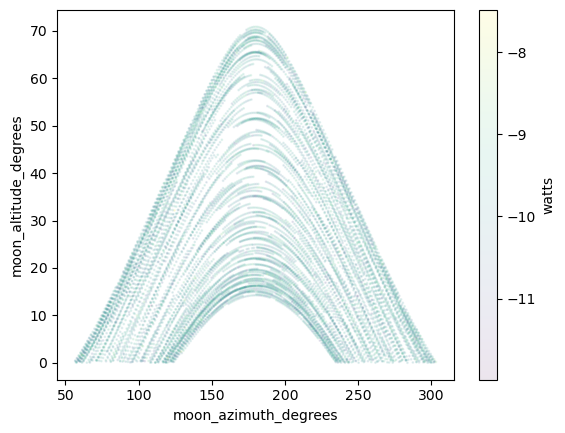

In [145]:
moon_up.plot.scatter(x='moon_azimuth_degrees', y='moon_altitude_degrees', c='watts', alpha=0.1, s=1)

<Axes: xlabel='moon_phase', ylabel='watts'>

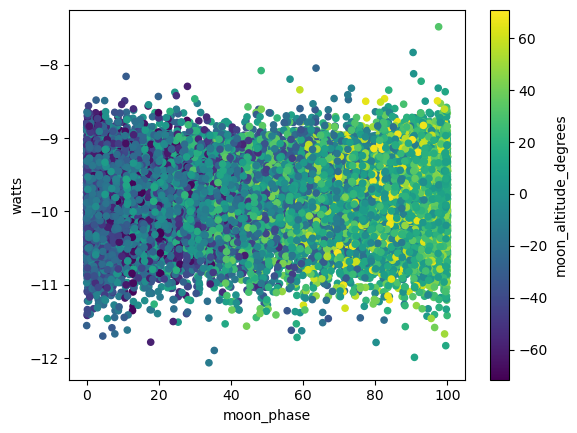

In [150]:
midnights.plot.scatter(x='moon_phase', y='watts', c='moon_altitude_degrees')

In [153]:
werewolf_time

,when_recorded_rounded,watts,moon_azimuth,moon_altitude,moon_phase,sun_azimuth,sun_elevation,when,moon_below_horizon,moon_altitude_degrees,moon_azimuth_degrees
19,2020-12-04 00:10:00+11:00,-9.285,3.200904,0.308024,90.656113,189.92,-33.44,2020-12-04 00:10:00+11:00,False,17.648502,183.398311
20,2020-12-04 00:35:00+11:00,-9.099,3.094423,0.308631,90.553673,183.00,-34.02,2020-12-04 00:35:00+11:00,False,17.683266,177.297381
21,2020-12-04 00:45:00+11:00,-9.610,3.051832,0.306840,90.512550,180.21,-34.08,2020-12-04 00:45:00+11:00,False,17.580632,174.857077
1320,2020-12-27 23:45:00+11:00,-9.686,2.114209,0.074030,93.494301,199.23,-30.48,2020-12-27 23:45:00+11:00,False,4.241622,121.135263
1321,2020-12-27 23:55:00+11:00,-9.508,2.071723,0.051181,93.527367,196.66,-31.12,2020-12-27 23:55:00+11:00,False,2.932465,118.700983
...,...,...,...,...,...,...,...,...,...,...,...
309968,2023-12-29 23:10:00+11:00,-9.140,3.387779,0.311954,93.800781,207.97,-27.58,2023-12-29 23:10:00+11:00,False,17.873673,194.105425
309969,2023-12-29 23:35:00+11:00,-9.206,3.281015,0.326296,93.720329,201.92,-29.77,2023-12-29 23:35:00+11:00,False,18.695365,187.988307
309970,2023-12-29 23:55:00+11:00,-9.438,3.195587,0.332514,93.655624,196.84,-31.15,2023-12-29 23:55:00+11:00,False,19.051665,183.093644
309971,2023-12-30 00:20:00+11:00,-9.320,3.088794,0.333593,93.574318,190.25,-32.36,2023-12-30 00:20:00+11:00,False,19.113451,176.974832


In [156]:
werewolf_time.describe()

,watts,moon_azimuth,moon_altitude,moon_phase,sun_azimuth,sun_elevation,moon_altitude_degrees,moon_azimuth_degrees
count,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000
mean,-9.792424,2.503024,0.488140,96.530501,189.499717,-52.958278,27.968354,143.412725
std,0.472986,0.430089,0.309069,2.979077,22.284402,17.130545,17.708333,24.642290
min,-11.988000,1.486506,-0.215231,90.000191,125.200000,-79.680000,-12.331812,85.170512
25%,-10.089000,2.170506,0.256542,94.025148,178.597500,-70.282500,14.698798,124.360861
50%,-9.763000,2.496994,0.444178,97.485313,193.155000,-52.115000,25.449514,143.067191
75%,-9.452000,2.833714,0.710411,99.291290,205.480000,-35.780000,40.703549,162.359874
max,-7.483000,3.565380,1.226727,99.997719,234.800000,-26.560000,70.286253,204.281232


<Axes: xlabel='moon_altitude_degrees', ylabel='watts'>

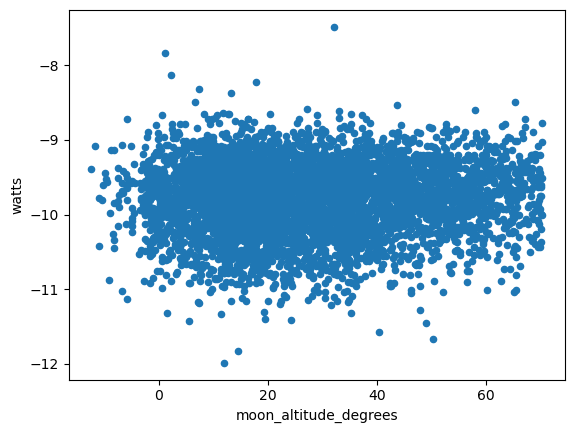

In [157]:
werewolf_time.plot.scatter(x='moon_altitude_degrees', y='watts')

In [159]:
werewolf_time[['watts', 'moon_altitude_degrees']].corr()['watts']

watts                    1.000000
moon_altitude_degrees    0.050752
Name: watts, dtype: float64

In [160]:
vampire_time = midnights[(midnights.moon_phase < 10)]

<Axes: xlabel='moon_altitude_degrees', ylabel='watts'>

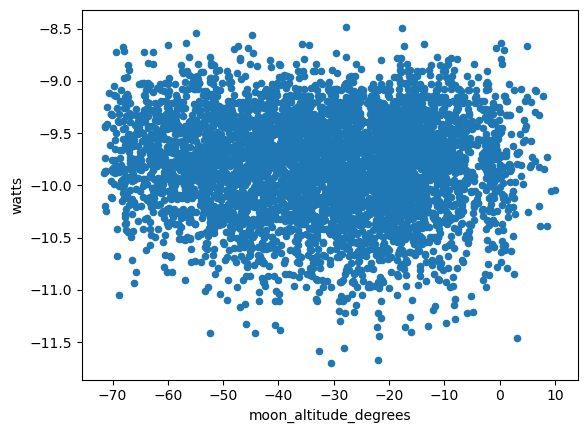

In [161]:
vampire_time.plot.scatter(x='moon_altitude_degrees', y='watts')

In [162]:
vampire_time[['watts', 'moon_altitude_degrees']].corr()['watts']

watts                    1.000000
moon_altitude_degrees   -0.035021
Name: watts, dtype: float64

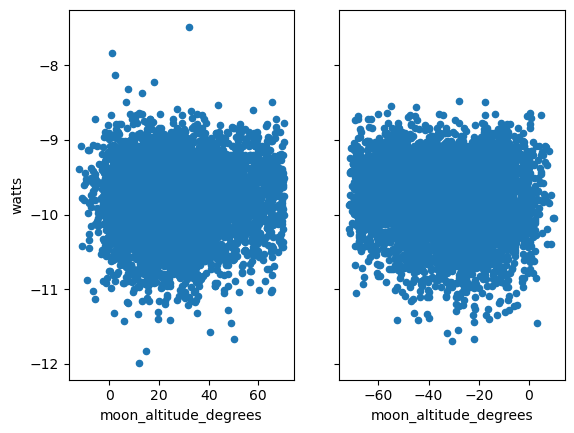

In [164]:
fig, axes = matplotlib.pyplot.subplots(ncols=2, sharey=True)
werewolf_time.plot.scatter(x='moon_altitude_degrees', y='watts', ax=axes[0])
vampire_time.plot.scatter(x='moon_altitude_degrees', y='watts', ax=axes[1])
axes[0] = 'Midnight, Moon phase > 90'
axes[1] = 'Midnight, Moon phase < 10'


In [170]:
moon_up[moon_up.watts.isin(moon_up.watts.nlargest(moon_up.shape[0]//100))]

,when_recorded_rounded,watts,moon_azimuth,moon_altitude,moon_phase,sun_azimuth,sun_elevation,when,moon_below_horizon,moon_altitude_degrees,moon_azimuth_degrees
1388,2020-12-28 23:50:00+11:00,-8.319,2.301063,0.129258,97.454521,198.09,-30.83,2020-12-28 23:50:00+11:00,False,7.405937,131.841174
2092,2021-01-08 00:00:00+11:00,-8.833,4.439220,0.289572,37.224361,196.99,-32.07,2021-01-08 00:00:00+11:00,False,16.591236,254.348568
2159,2021-01-08 23:05:00+11:00,-8.658,4.889555,0.052316,26.867332,210.81,-27.51,2021-01-08 23:05:00+11:00,False,2.997514,280.150891
2292,2021-01-10 23:55:00+11:00,-8.793,5.152474,0.003589,9.162823,198.77,-32.08,2021-01-10 23:55:00+11:00,False,0.205607,295.215010
4139,2021-02-04 23:00:00+11:00,-8.726,4.389524,0.376021,52.804993,217.11,-31.41,2021-02-04 23:00:00+11:00,False,21.544414,251.501171
...,...,...,...,...,...,...,...,...,...,...,...
289443,2023-03-18 00:35:00+11:00,-8.636,4.701907,0.316046,23.118338,192.54,-54.30,2023-03-18 00:35:00+11:00,False,18.108080,269.399408
291292,2023-04-13 00:15:00+10:00,-8.342,3.737972,0.994712,59.093876,169.32,-64.63,2023-04-13 00:15:00+10:00,False,56.992782,214.170034
292945,2023-05-06 23:05:00+10:00,-8.605,2.739227,1.011750,99.178009,214.70,-69.79,2023-05-06 23:05:00+10:00,False,57.968997,156.946136
306053,2023-11-06 00:50:00+11:00,-8.709,4.052302,0.123454,48.062504,176.62,-40.51,2023-11-06 00:50:00+11:00,False,7.073390,232.179823


In [171]:
moon_down[moon_down.watts.isin(moon_down.watts.nlargest(moon_up.shape[0]//100))]

,when_recorded_rounded,watts,moon_azimuth,moon_altitude,moon_phase,sun_azimuth,sun_elevation,when,moon_below_horizon,moon_altitude_degrees,moon_azimuth_degrees
984,2020-12-22 23:00:00+11:00,-8.778,1.405133,-0.091392,55.028111,209.47,-26.70,2020-12-22 23:00:00+11:00,True,-5.236370,80.508205
1102,2020-12-25 00:00:00+11:00,-8.320,1.493508,-0.163534,73.389595,194.95,-31.38,2020-12-25 00:00:00+11:00,True,-9.369820,85.571677
2822,2021-01-17 23:20:00+11:00,-8.433,0.611429,-0.473897,19.878801,208.82,-30.08,2021-01-17 23:20:00+11:00,True,-27.152316,35.032303
2828,2021-01-18 00:50:00+11:00,-8.737,0.234112,-0.600922,20.379416,184.58,-35.53,2021-01-18 00:50:00+11:00,True,-34.430280,13.413654
5217,2021-02-19 23:35:00+11:00,-8.608,1.079122,-0.570867,47.685215,210.82,-39.87,2021-02-19 23:35:00+11:00,True,-32.708249,61.829133
...,...,...,...,...,...,...,...,...,...,...,...
296765,2023-06-29 00:45:00+10:00,-8.409,0.995519,-0.216272,72.379395,133.13,-75.47,2023-06-29 00:45:00+10:00,True,-12.391458,57.039029
298274,2023-07-20 00:50:00+10:00,-8.828,5.691646,-0.910445,3.276314,137.58,-73.28,2023-07-20 00:50:00+10:00,True,-52.164634,326.107273
298420,2023-07-22 00:40:00+10:00,-8.602,6.090437,-0.936547,12.963675,145.38,-74.28,2023-07-22 00:40:00+10:00,True,-53.660165,348.956359
307227,2023-11-22 00:35:00+11:00,-8.533,1.151728,-0.164635,62.746830,181.91,-36.33,2023-11-22 00:35:00+11:00,True,-9.432916,65.989149
